## Necessary Imports
The following import shall be sufficient. 

In [ ]:
import pandas as pd # for data manipulation
import numpy as np # numerical work
import matplotlib.pyplot as plt # plotting
import seaborn as sns # stats plots 
import statsmodels.formula.api as smf # most time series formulas
import statsmodels.api as sm # general package call
from scipy import stats

## Exercise 0
(basic)Write one line about each of the package imported above that describe their functionality or why they are imported.

**panda:** Store and manipulate tabular data in rows of observations and columns of variables.

**numpy:** Provides support for large, multi-dimensional arrays and matrices, and also has a collection of mathematical functions to operate on these arrays.

**seaborn:** Provides a high-level interface for creating attractive and informative statistical graphics.

**statsmodels:** Provides a way to specify models using formula strings and DataFrames.

## Exercise 1
Use python to simulate and plot some data from simple ARIMA models. The exercise is taken from the book https://otexts.com/fpp2/arima-exercises.html. You are encouraged to read the corresponding chapter to prepare for the examination.  



**a.(basic)** Use the following Python code to generate data from an AR(1) model with  $𝜙_1$=0.6  and  $𝜎_2$=1 . The process starts with  $𝑦_1$=0 . (You just need to run the cell to generate data).

In [3]:
np.random.seed(25)# fix the random seed
mu, sigma = 0, 0.1 # mean and standard deviation
y = np.zeros(100)
e = np.random.normal(mu, sigma, 100)
phi1=0.6
for i in range(2,100):
    y[i] = phi1*y[i-1] + e[i]

**b.(basic)** Produce a time plot for the series. How does the plot change as you change $\phi_1$?. It is sufficient to produce a plots for different values of $\phi_1$.

When phi value gets closer to 1, the new y value will be similar to the previous one. When phi value gets closer to -1 then the new y value will be in the opposite direction compared to old one.

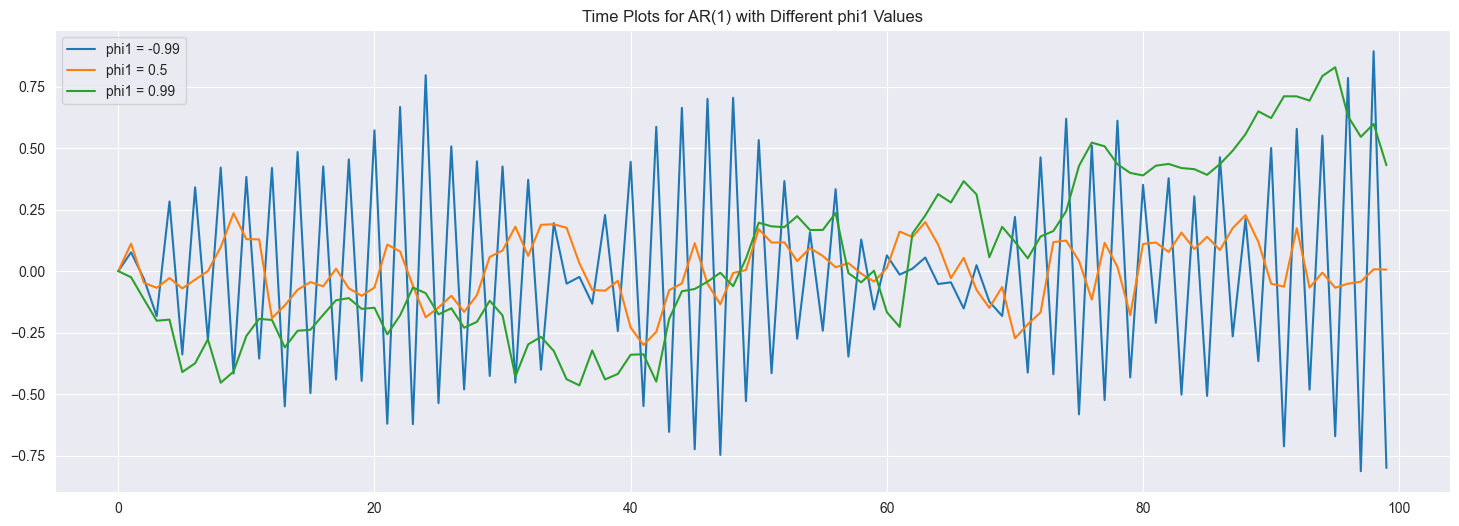

In [4]:
def generate_ar1(phi1, mu=0, sigma=0.1, size=100):
    y = np.zeros(size)
    e = np.random.normal(mu, sigma, size)
    for i in range(1, size):
        y[i] = phi1 * y[i - 1] + e[i]
    return y

phi_values = [-0.99, 0.5, 0.99]
plt.figure(figsize=(18, 6))

for phi in phi_values:
    y = generate_ar1(phi)
    plt.plot(y, label=f'phi1 = {phi}')

plt.title("Time Plots for AR(1) with Different phi1 Values")
plt.legend()
plt.show()

**c.(basic)** Write your own code to generate data from an MA(1) model with $\theta_1=0.6$ and $\sigma_2=1$. Plot the results also.

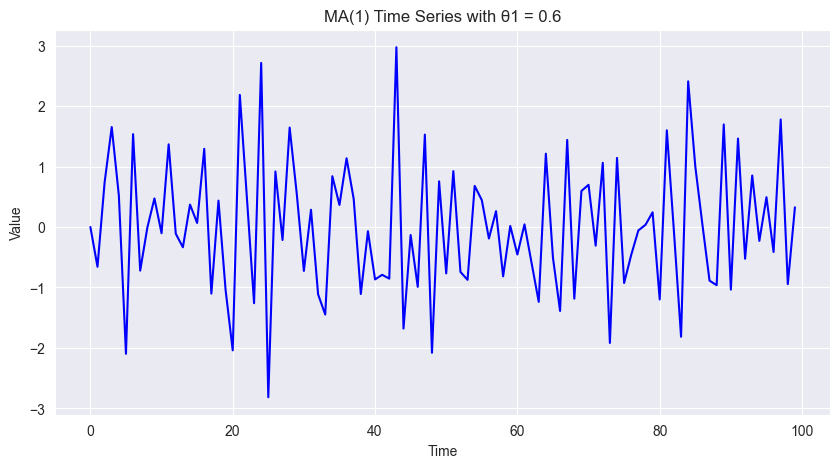

In [5]:
# Setting parameters
theta1 = 0.6
sigma = 1
size = 100
np.random.seed(0)
e = np.random.normal(0, sigma, size)

# Generating MA(1) process
y = np.zeros(size)
for i in range(1, size):
    y[i] = e[i] - theta1 * e[i - 1]

# Plotting the generated series
plt.figure(figsize=(10, 5))
plt.plot(y, color='blue', linewidth=1.5)
plt.title("MA(1) Time Series with θ1 = 0.6")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.show()

**d.(Regular)** Generate data from an ARMA(1,1) model with $\phi_1 = 0.6$ and $\theta_1=0.6$ and $\sigma_2=1$.


In [11]:
# Generating ARMA(1,1) process
theta1 = 1
phi1 = 0.6
sigma = 1
size = 100
e = np.random.normal(0, sigma, size)
y = np.zeros(size)

for i in range(1, size):
    y[i] = phi1 * y[i - 1] + e[i] - theta1 * e[i - 1]

# Plotting the generated series
plt.figure(figsize=(10, 5))
plt.plot(y, color='blue', linewidth=1.5)
plt.title("MA(1) Time Series with θ1 = 0.6")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.show()

**e.(Regular)** Generate data from an AR(2) model with $\phi_1=-0.8$, and $\phi_2=0.3$ and $\sigma_2=1$. (Note that these parameters will give a non-stationary series.)


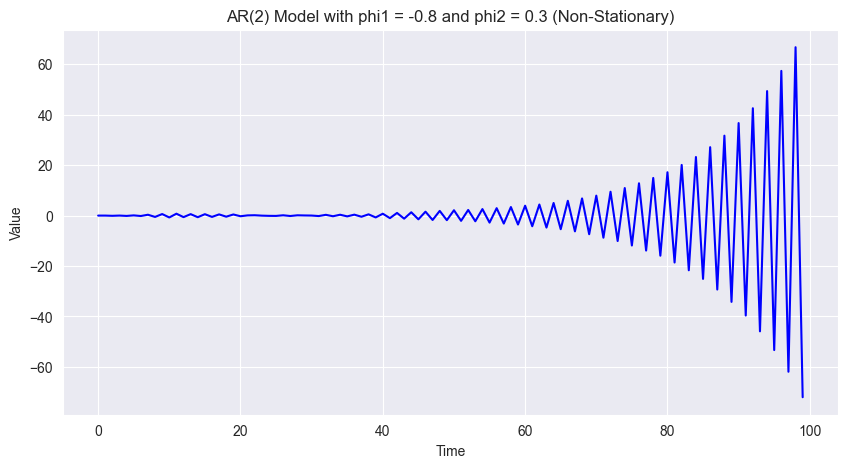

In [9]:
np.random.seed(25)
phi1 = -0.8
phi2 = 0.3
theta2 = 1
mu, sigma = 0, 0.1
y_ar2 = np.zeros(100)
e = np.random.normal(mu, sigma, 100)
for t in range(2, 100):
    y_ar2[t] = phi1 * y_ar2[t-1] + phi2 * y_ar2[t-2] + e[t]

plt.figure(figsize=(10, 5))
plt.plot(y_ar2, color = 'blue')
plt.title('AR(2) Model with phi1 = -0.8 and phi2 = 0.3 (Non-Stationary)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()

**f.(Regular)**  Graph the latter two series and compare them.

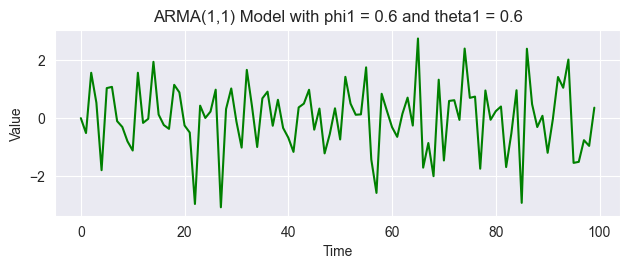

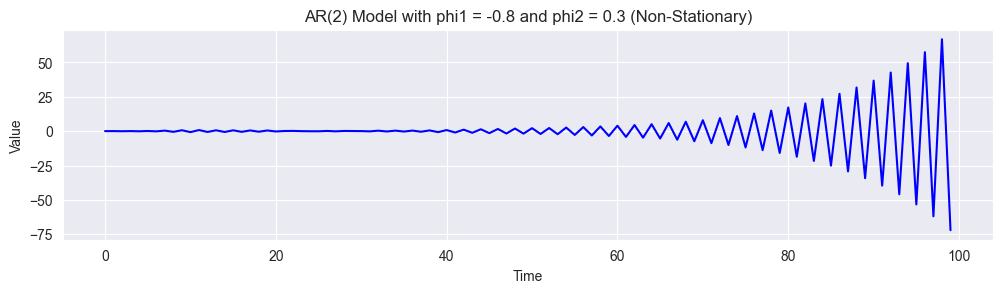

In [12]:
plt.subplot(2, 1, 2)
plt.plot(y, color='green')
plt.title('ARMA(1,1) Model with phi1 = 0.6 and theta1 = 0.6')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(y_ar2, color='blue')
plt.title('AR(2) Model with phi1 = -0.8 and phi2 = 0.3 (Non-Stationary)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)





**g.(Regular)** How can you verify that the series in $e$ is indeed non-stationary?

The series is non-stationary because the mean and variance of the series are not constant over time.

## Exercise 2

Consider usmelec, the total net generation of electricity (in billion kilowatt hours) by the U.S. electric industry (monthly for the period January 1973 – June 2013). In general there are two peaks per year: in mid-summer and mid-winter.

The exercise is taken from the book https://otexts.com/fpp2/arima-exercises.html. You are encouraged to read the corresponding chapter to prepare for the examination.


In [100]:
# Read data
usmelec_data = pd.read_csv('usmelec.csv')
usmelec_data.head()# Inspect first few values.

,index,value
0,1973 Jan,160.218
1,1973 Feb,143.539
2,1973 Mar,148.158
3,1973 Apr,139.589
4,1973 May,147.395


Note that index is just the column header. For later convinience we change the date format to yyyy-mm-dd. And since it is a time series let us set its index as the date. 

In [101]:
usmelec_data['index'] = pd.to_datetime(usmelec_data['index']) #change format to datetime
usmelec_data.set_index('index',inplace=True)# setting index. 
usmelec_data.head()

,value
index,
1973-01-01,160.218
1973-02-01,143.539
1973-03-01,148.158
1973-04-01,139.589
1973-05-01,147.395


**a. (Basic)** Create line plot for the above time series. Do you observe a trend or seasonality in this plot?

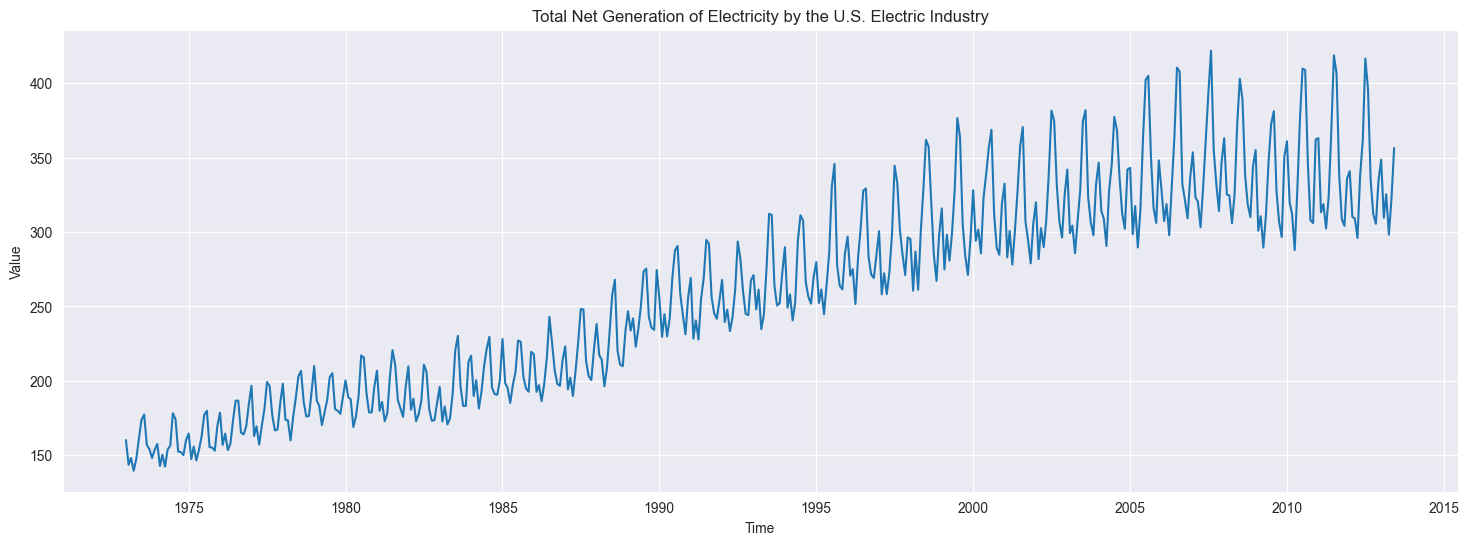

In [102]:
# Create line plot
plt.figure(figsize=(18, 6))
plt.plot(usmelec_data)
plt.title("Total Net Generation of Electricity by the U.S. Electric Industry")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.show()

There is a trend in the plot. The value of the series increases over time. There is also a seasonality in the plot. The value of the series increases and decreases periodically (each year).

**b.(Basic)** Read the documentation about creating [KDE](https://en.wikipedia.org/wiki/Kernel_density_estimation) plot  [here](https://seaborn.pydata.org/generated/seaborn.kdeplot.html). Create density plot for your time series. 

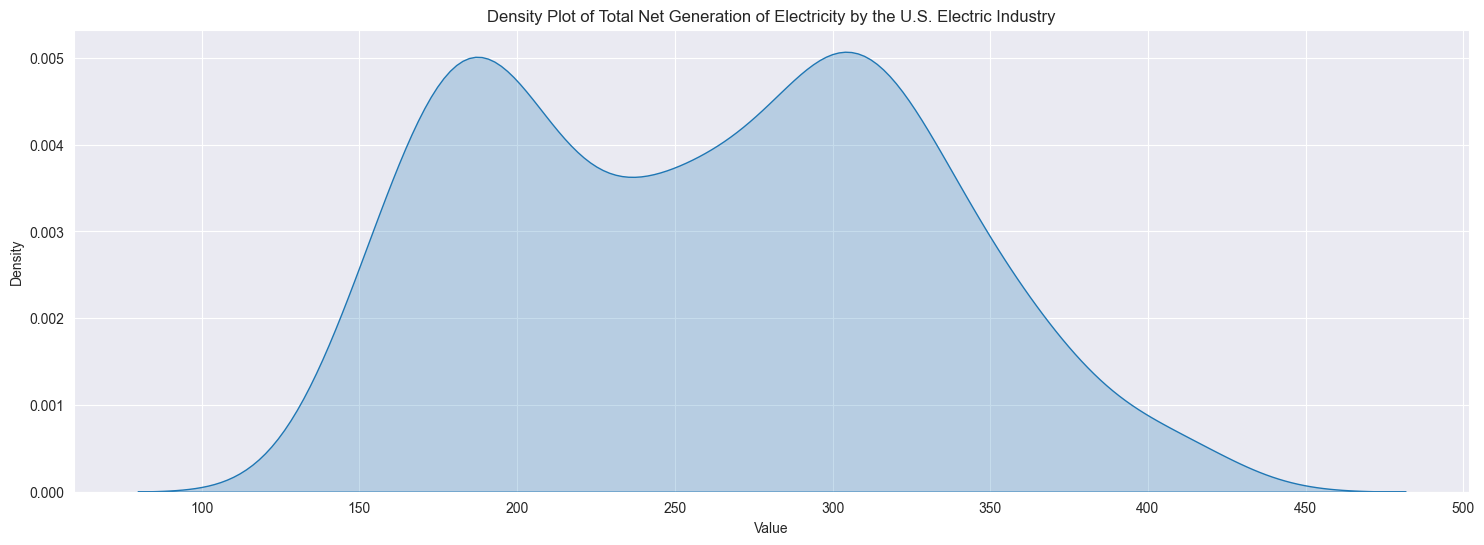

In [103]:
# Create a density plot
plt.figure(figsize=(18, 6))
sns.kdeplot(usmelec_data['value'], fill=True)
plt.title("Density Plot of Total Net Generation of Electricity by the U.S. Electric Industry")
plt.xlabel("Value")
plt.ylabel("Density")
plt.grid(True)
plt.show()

 **b.(Basic)**	Create Box plot and violin plot for monthly generation. What seasonal pattern you can deduce from these plots.

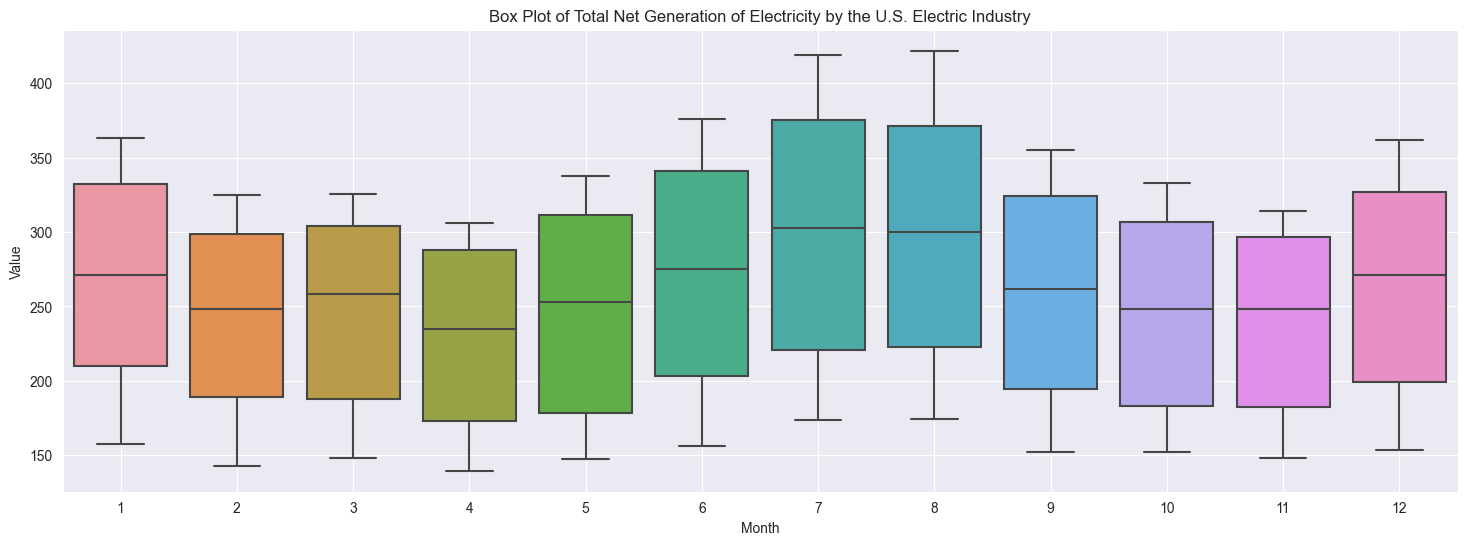

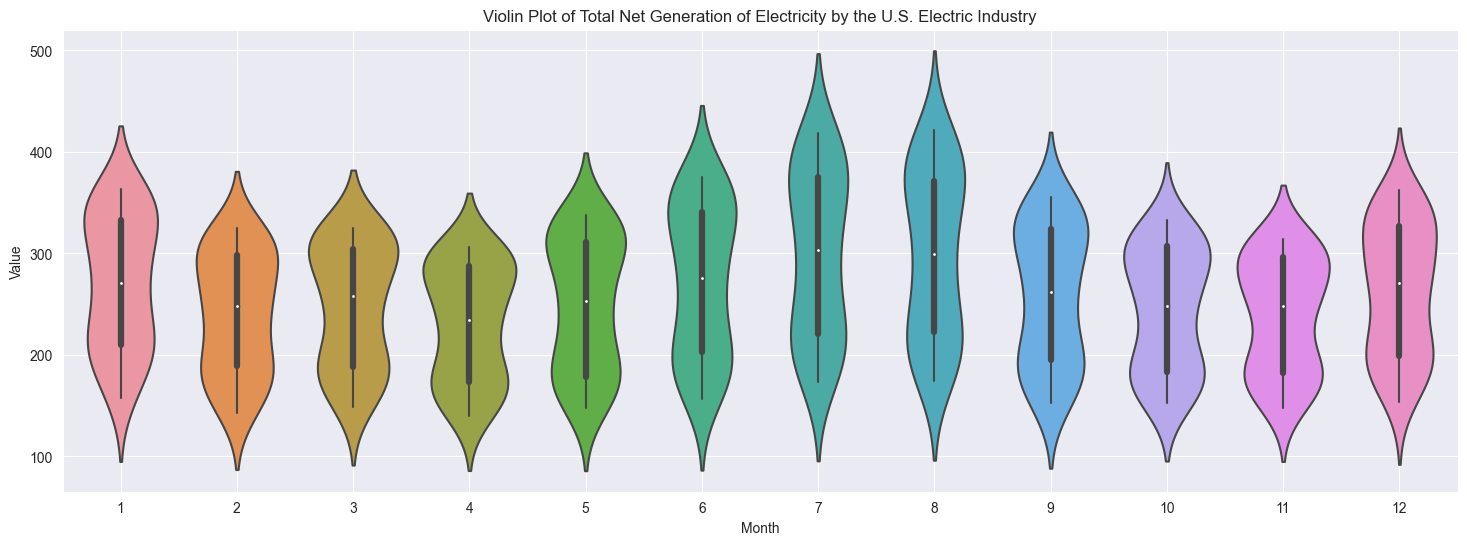

In [104]:
# Create box plot
plt.figure(figsize=(18, 6))
sns.boxplot(x=usmelec_data.index.month, y=usmelec_data['value'])
plt.title("Box Plot of Total Net Generation of Electricity by the U.S. Electric Industry")
plt.xlabel("Month")
plt.ylabel("Value")
plt.grid(True)
plt.show()
# Create violin plot
plt.figure(figsize=(18, 6))
sns.violinplot(x=usmelec_data.index.month, y=usmelec_data['value'])
plt.title("Violin Plot of Total Net Generation of Electricity by the U.S. Electric Industry")
plt.xlabel("Month")
plt.ylabel("Value")
plt.grid(True)
plt.show()

The seasonal pattern is that the value of the series is higher in summer and winter than in spring and autumn.

**c.(Basic)** Create [PACF](https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.pacf.html?highlight=pacf)

What you can conclude from this visulization. 

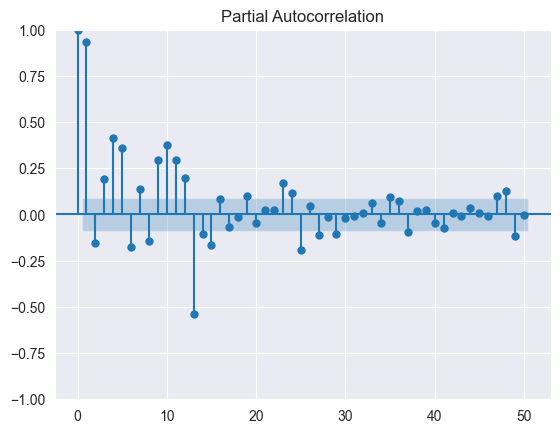

In [105]:
# Create PACF plot
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(usmelec_data['value'], lags=50)
plt.show()

The first 12 lags are significant, as shown in the PACF graphic. This indicates that the current value of the series is associated with the first 12 delays. The 13th lag is also not significant, according to the PACF plot. This indicates that there is no correlation between the 13th lag and the series' current value.

**d.(Basic)**	Examine the 12-month moving average and variance of this series to see what kind of trend is involved.

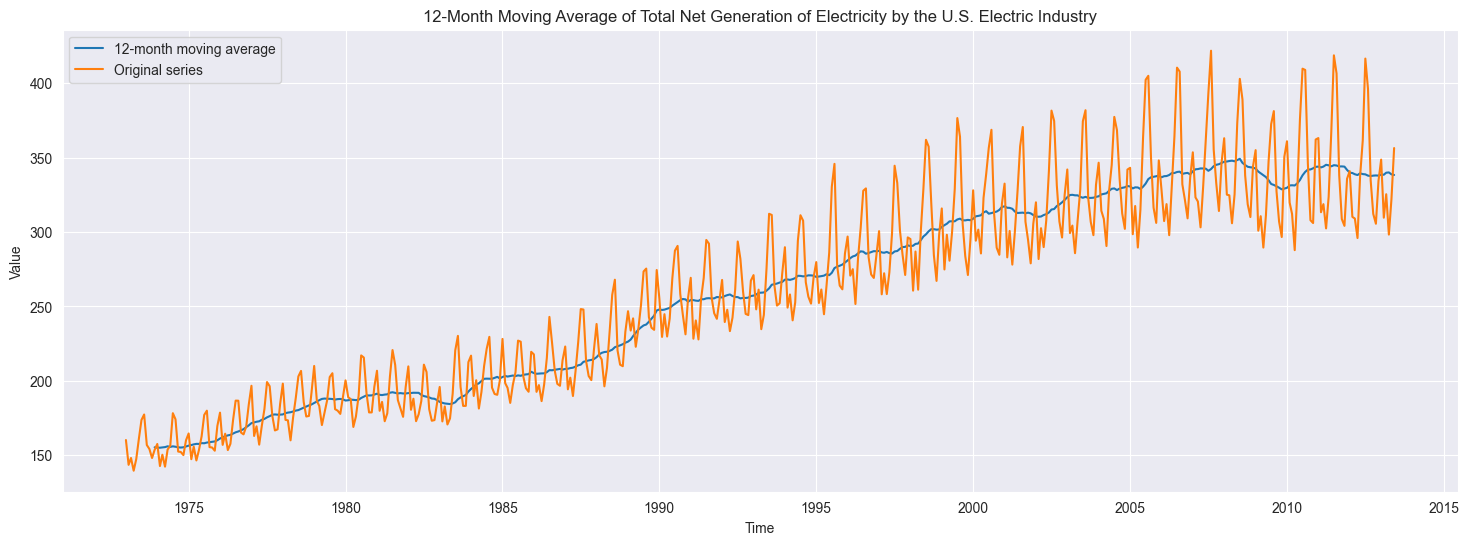

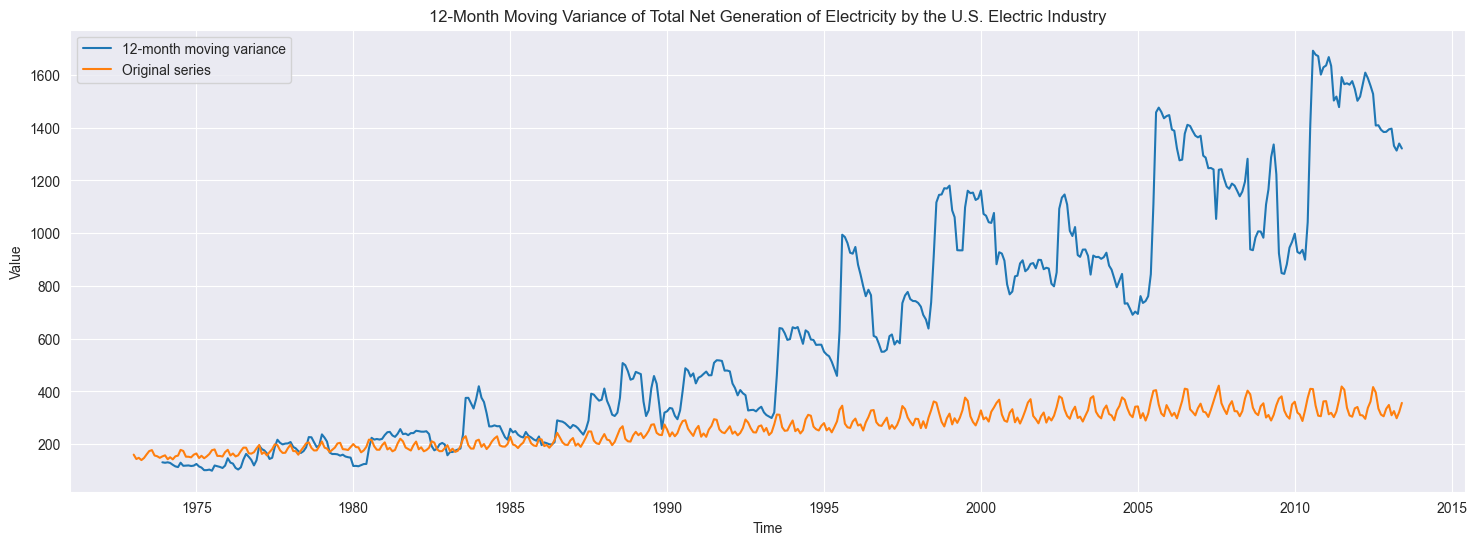

In [106]:
# Create moving average plot
plt.figure(figsize=(18, 6))
plt.plot(usmelec_data.rolling(window=12).mean(), label='12-month moving average')
plt.plot(usmelec_data, label='Original series')
plt.legend(loc='best')
plt.title("12-Month Moving Average of Total Net Generation of Electricity by the U.S. Electric Industry")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.show()

# Create moving variance plot
plt.figure(figsize=(18, 6))
plt.plot(usmelec_data.rolling(window=12).var(), label='12-month moving variance')
plt.plot(usmelec_data, label='Original series')
plt.legend(loc='best')
plt.title("12-Month Moving Variance of Total Net Generation of Electricity by the U.S. Electric Industry")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.show()

**e.(Basic)**	Do the data need transforming? If so, find a suitable transformation.

*Brief Answer:* (explain briefly why data need transforming)

**Hint:** To find suitable transformation, apply different transformations such as log, Box-Cox etc and show visually which one stabilize the variance the most. 


The data need transforming because the variance of the series is not constant over time. The variance of the series increases over time.

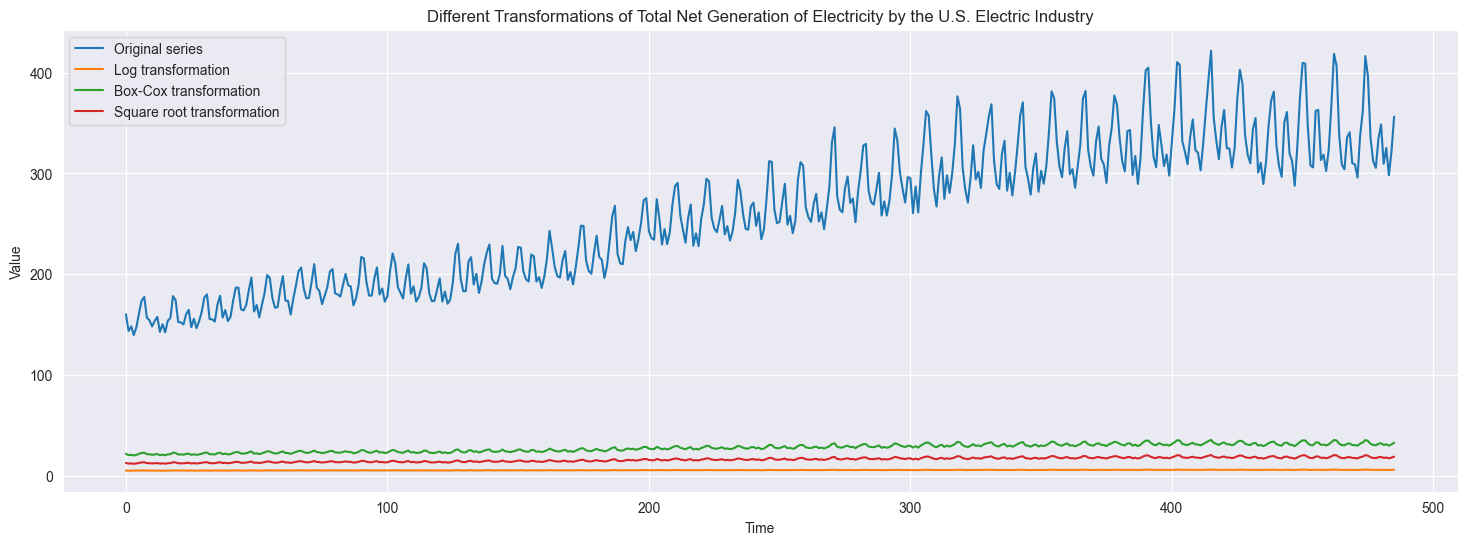

In [107]:
series_data = usmelec_data['value'].values

plt.figure(figsize=(18, 6))
plt.plot(series_data, label='Original series')
# Log transformation
plt.plot(np.log(series_data), label='Log transformation')
# Box-Cox transformation
plt.plot(stats.boxcox(series_data)[0], label='Box-Cox transformation')
# Square root transformation
plt.plot(np.sqrt(series_data), label='Square root transformation')
plt.legend(loc='best')
plt.title("Different Transformations of Total Net Generation of Electricity by the U.S. Electric Industry")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.show()

Substantiate here breifly why your choosen transformation is appropriate?

The log transformation is appropriate because it stabilizes the variance of the series the most.

**f.(Regular)**	Are the data stationary? If not, find an appropriate differencing which yields stationary data. Most time second order differencing is sufficient.

The data is not stationary because the mean and variance of the series are not constant over time.



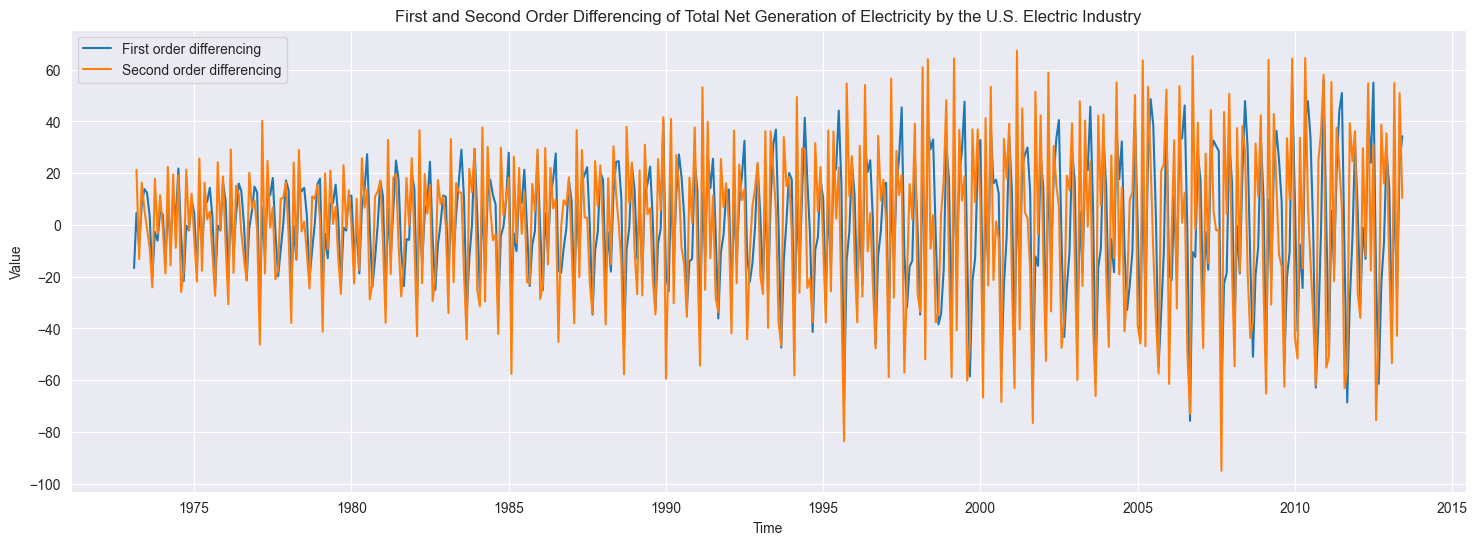

In [108]:
# Create differenced series
plt.figure(figsize=(18, 6))
plt.plot(usmelec_data['value'].diff(), label='First order differencing')
plt.plot(usmelec_data['value'].diff().diff(), label='Second order differencing')
plt.legend(loc='best')
plt.title("First and Second Order Differencing of Total Net Generation of Electricity by the U.S. Electric Industry")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.show()

Substantiate that your choosen difference is appropriate?

**Hint:** [Augmented Dickey–Fuller](https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html) test can be used to test stationarity. 

If you need code add a code block yourself.

In [109]:
# Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
adf_test_first = adfuller(usmelec_data['value'].diff().dropna())
adf_test_second = adfuller(usmelec_data['value'].diff().diff().dropna())
adf_tests = [adf_test_first, adf_test_second]
for adf_test in adf_tests:
    print('ADF Statistic: %f' % adf_test[0])
    print('p-value: %f' % adf_test[1])
    print('Critical Values:')
    for key, value in adf_test[4].items():
        print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.663435
p-value: 0.000001
Critical Values:
	1%: -3.444
	5%: -2.868
	10%: -2.570
ADF Statistic: -11.306206
p-value: 0.000000
Critical Values:
	1%: -3.444
	5%: -2.868
	10%: -2.570


The second order differencing is appropriate because the p-value of the second order differencing is lower than the p-value of the first order differencing.

**g.(Regular)**	Identify a couple of ARIMA models that might be useful in describing the time series. Which of your models is the best according to their AIC values?
Hint: You can create different ARIMA models using different values of $p$ and $q$. You can either choose these values randomly(not a vey good idea) or using ACF/PACF or apply grid search. 

In [110]:
import itertools
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Assuming your time series is stored in the variable `data`

# Set the range for p, d, q
p = range(0, 3)
d = range(0, 3)
q = range(0, 3)

# Generate all different combinations of p, d, and q triplets
pdq = list(itertools.product(p, d, q))

best_aic = np.inf
best_pdq = None
temp_model = None

for param in pdq:
    try:
        temp_model = ARIMA(usmelec_data['value'], order=param)
        results = temp_model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_pdq = param
    except:
        continue

print(f"The best model is ARIMA{best_pdq} with AIC={best_aic}")


C:\Users\XPS9360\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\XPS9360\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\XPS9360\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\XPS9360\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\XPS9360\AppData\Local\Programs\Python\P

The best model is ARIMA(2, 1, 2) with AIC=4131.1783471905665


**h.(Regular)** Estimate the parameters of your best model and do diagnostic testing on the **residuals** (mind the difference between residual and error). Do the residuals resemble white noise? If not, try to find another ARIMA model which fits better.

Hint: Look for Ljung-Box Test and also  Shapiro-Wilk test for normality.

C:\Users\XPS9360\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\XPS9360\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\XPS9360\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  486
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2060.589
Date:                Sun, 01 Oct 2023   AIC                           4131.178
Time:                        12:28:56   BIC                           4152.099
Sample:                    01-01-1973   HQIC                          4139.398
                         - 06-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9975      0.002    426.115      0.000       0.993       1.002
ar.L2         -0.9993      0.002   -633.711      0.000      -1.002      -0.996
ma.L1         -0.9531      0.031    -30.473      0.0

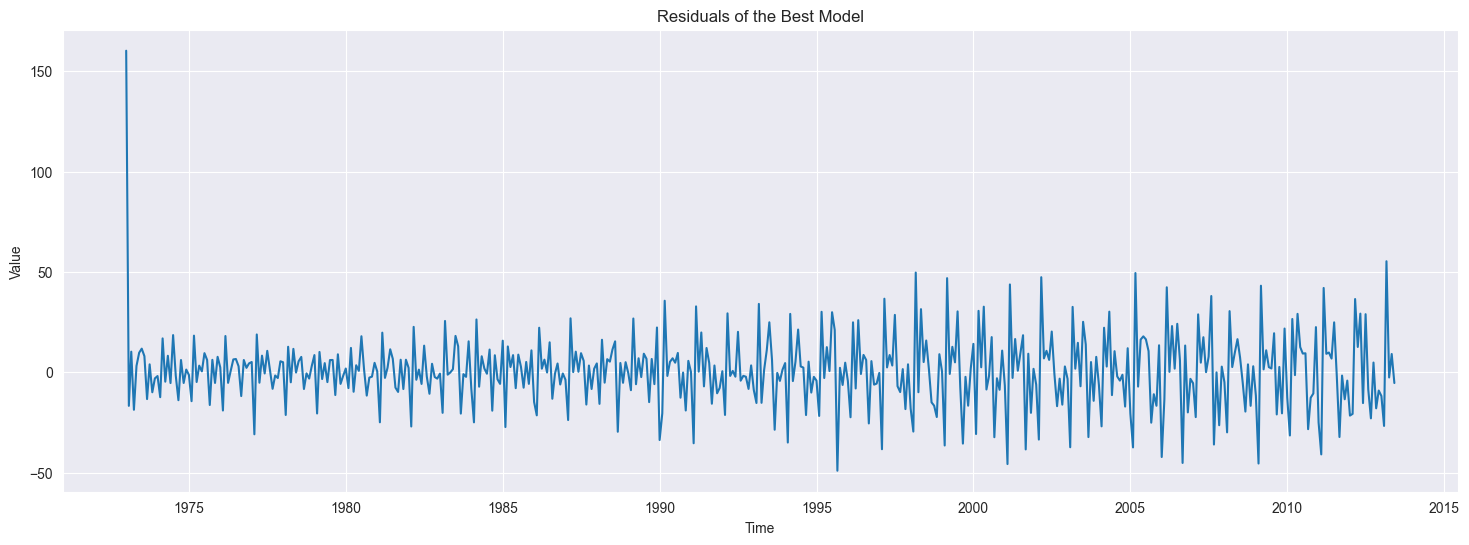

In [111]:
# Fit the best model
best_model = ARIMA(usmelec_data['value'], order=best_pdq)
best_results = best_model.fit()
print(best_results.summary())

# Plot the residuals
plt.figure(figsize=(18, 6))
plt.plot(best_results.resid)
plt.title("Residuals of the Best Model")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.show()

The residuals do not resemble white noise because the residuals are not normally distributed and are not independent.

**i.(Regular)**	Forecast the next 15 years of electricity generation by the U.S. electric industry. Get the latest figures from the [EIA](https://www.eia.gov/totalenergy/data/monthly/#electricity) to check the accuracy of your forecasts.

In [112]:
# Forecast the next 15 years
forecast = best_results.get_forecast(steps=15 * 12)
forecast_ci = forecast.conf_int()
print(forecast.summary_frame())

value             mean     mean_se  mean_ci_lower  mean_ci_upper
2013-07-01  380.930965   16.788707     348.025704     413.836226
2013-08-01  365.813629   24.289193     318.207684     413.419573
2013-09-01  326.220791   30.383323     266.670572     385.771010
2013-10-01  301.833857   35.411325     232.428935     371.238778
2013-11-01  317.072682   39.465694     239.721344     394.424020
...                ...         ...            ...            ...
2028-02-01  357.442408  232.118770     -97.502022     812.386837
2028-03-01  320.022644  232.836241    -136.328003     776.373291
2028-04-01  304.016507  233.533631    -153.701000     761.734013
2028-05-01  325.443573  234.170500    -133.522173     784.409319
2028-06-01  362.811567  234.766303     -97.321932     822.945066

[180 rows x 4 columns]


**j.(Regular)**	Eventually, the prediction intervals are so wide that the forecasts are not particularly useful. How many years of forecasts do you think are sufficiently accurate to be usable?

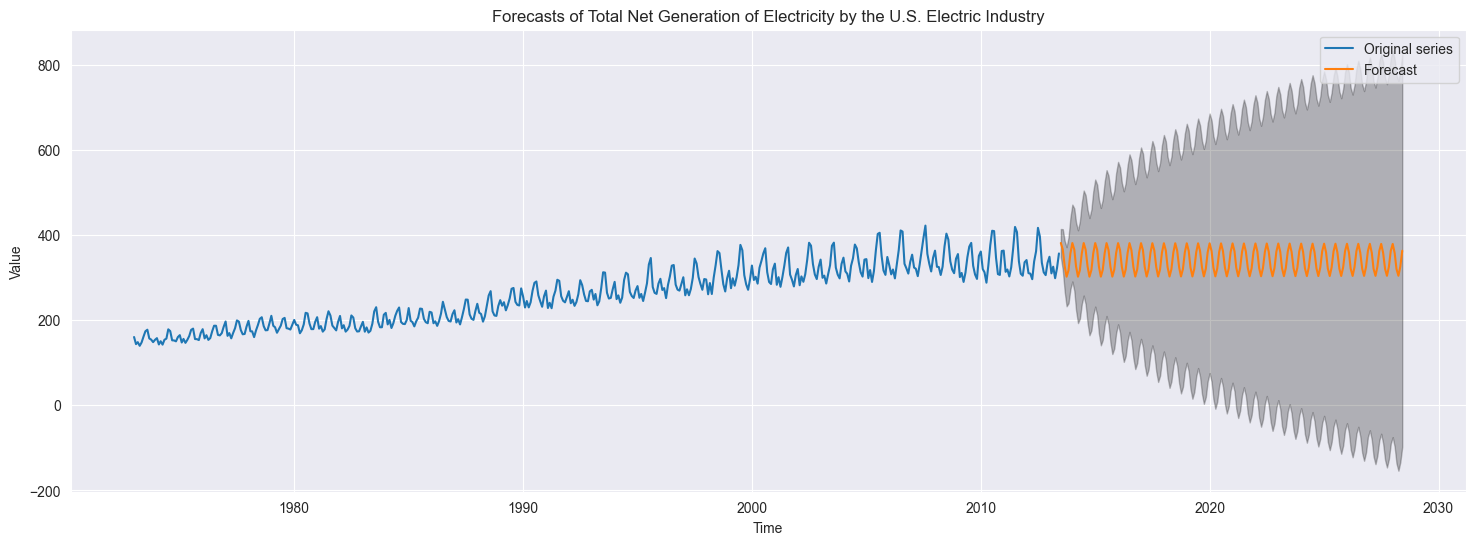

In [113]:
# Plot the forecasts
plt.figure(figsize=(18, 6))
plt.plot(usmelec_data['value'], label='Original series')
plt.plot(forecast.predicted_mean, label='Forecast')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='k', alpha=.25)
plt.legend(loc='best')
plt.title("Forecasts of Total Net Generation of Electricity by the U.S. Electric Industry")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.show()

The forecasts are not particularly useful after 5 years because the prediction intervals are so wide.

## Exercise 3 (Advance)
In the previous exercise we suggested to choose paramter either randomly or using PACF curve. However, in pratice this process can be automatizes. One such algorihm is [Hyndman-Khandakar algorithm](https://otexts.com/fpp2/arima-r.html). Your first task is to implement this algorithm in Python. 

In [114]:
#Implementation Hyndman-Khandakar algorithm
def hyndman_khandakar(data, max_p=5, max_q=5, d=0):
    # Set the range for p, d, q
    p = range(0, max_p)
    q = range(0, max_q)

    # Generate all different combinations of p, d, and q triplets
    pdq = list(itertools.product(p, [d], q))

    best_aic = np.inf
    best_pdq = None
    temp_model = None

    for param in pdq:
        try:
            temp_model = ARIMA(data, order=param)
            results = temp_model.fit()
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
        except:
            continue

    return best_pdq, best_aic



**a.** Apply this algorithm to the dataset in Exercise 2 and compare the results. Compare the model performance as well as the values of the choosen parameters.

In [115]:
# Apply the algorithm to the dataset in Exercise 2
best_pdq, best_aic = hyndman_khandakar(usmelec_data['value'])
print(f"The best model is ARIMA{best_pdq} with AIC={best_aic}")

C:\Users\XPS9360\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\XPS9360\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\XPS9360\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\XPS9360\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\XPS9360\AppData\Local\Programs\Python\P

The best model is ARIMA(4, 0, 2) with AIC=4111.210898773994


C:\Users\XPS9360\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
